In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from datetime import datetime 
#plt.style.use('dark_background')

%matplotlib inline

## Dataset Description
#### Type: Timeseries, Multivariate

The dataset consist on the reading of 14 temperature modulated mox sensors.
Each experiment consists of 100 measurements: 10 experimental mixtures uniformly distributed in the range of 0 - 20 ppm and 10 replicates per concentration.

At the beggining of each experiment the gas chamber is cleaned by 15 mins using a stream of 240 mln/min. And after that the gas mixtures are released at 240mln/min, thus assuming the flow rate is constant.

A single experiment lasted 25 hours (100 samples x 15 minutes / sample) and was replicated on 13 working days.


## Data Loading

In [2]:
freq='5S'
path = "./dataset_tempMod_CO_RH"

# I get a list of the filenames for later use in a for loop.
# Then they get sorted by name and the last file which is the Readme.txt gets sliced.
files = sorted(os.listdir(path))[:-1]
files

['20160930_203718.csv',
 '20161001_231809.csv',
 '20161003_085624.csv',
 '20161004_104124.csv',
 '20161005_140846.csv',
 '20161006_182224.csv',
 '20161007_210049.csv',
 '20161008_234508.csv',
 '20161010_095046.csv',
 '20161011_113032.csv',
 '20161013_143355.csv',
 '20161014_184659.csv',
 '20161016_053656.csv']

In [3]:
df = pd.read_csv(path + "/" + files[1])
#df['Heater voltage (V)'] = np.where(df['Heater voltage (V)'] > 0.5, "HIGH", "LOW")
df.head()

,Time (s),CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),...,0.1093,0.1341,0.1151,0.1188,0.1062,0.1290,0.1183,0.1204,0.1087,0.1130
0,0.309,0.0,50.25,26.54,242.0039,0.8928,0.0710,0.1436,0.1059,0.1013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.619,0.0,50.25,26.54,241.5810,0.8960,0.0762,0.1402,0.1080,0.1007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.928,0.0,50.25,26.54,241.1596,0.8980,0.0797,0.1392,0.1112,0.1011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.235,0.0,50.25,26.54,240.7642,0.8983,0.0822,0.1395,0.1142,0.1021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.545,0.0,50.25,26.54,240.7683,0.8990,0.0844,0.1404,0.1172,0.1032,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Binning of time series to reduce instrumental noise.

In [4]:
df['Time (s)'] = pd.to_timedelta(df['Time (s)'], unit='sec')
df.set_index('Time (s)', inplace=True)
df = df.resample(freq, label='right').mean().reset_index()
df['Time (s)'] = [x.seconds for x in df['Time (s)']]
df.head()

,Time (s),CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),...,0.1093,0.1341,0.1151,0.1188,0.1062,0.1290,0.1183,0.1204,0.1087,0.1130
0,0,0.0,50.250,26.540000,240.992153,0.817429,0.571194,1.266488,2.124618,1.302047,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,0.0,50.250,26.540000,240.410037,0.200969,44.879881,53.788488,61.127913,31.790012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,0.0,50.087,26.540000,240.084950,0.199969,7.487550,5.033900,15.317925,24.174812,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15,0.0,49.740,26.527763,240.045956,0.283256,0.792806,0.715031,1.481675,13.170119,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20,0.0,49.740,26.500000,240.112262,0.855694,0.217900,0.480013,1.184737,0.745700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exploratory Analysis 

#### Checking for missing values.

In [5]:
sns.set_style("whitegrid")

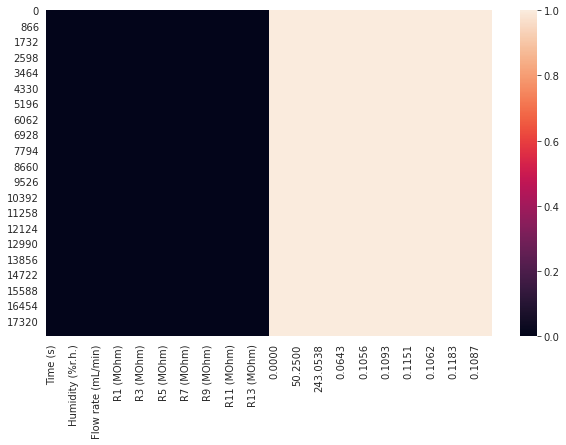

In [6]:
hm = sns.heatmap(df.isnull(), cbar=True)
hm = plt.gcf()
hm.set_size_inches(10,6)

In [7]:
# Slicing the first 20 columns that doesn't have NaN values.
df = df.iloc[:,:20]
df.head(185)

,Time (s),CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
0,0,0.0,50.250000,26.540000,240.992153,0.817429,0.571194,1.266488,2.124618,1.302047,1.974476,2.140512,2.576141,3.364359,2.878465,3.828512,4.416753,4.868312,4.314412,5.618347
1,5,0.0,50.250000,26.540000,240.410037,0.200969,44.879881,53.788488,61.127913,31.790012,59.018956,59.277912,61.188494,60.364256,51.113350,64.962094,62.616375,58.756450,52.108494,66.846606
2,10,0.0,50.087000,26.540000,240.084950,0.199969,7.487550,5.033900,15.317925,24.174812,40.636938,36.357325,40.792837,52.965269,46.539269,56.408525,57.386888,50.151412,44.637194,63.627150
3,15,0.0,49.740000,26.527763,240.045956,0.283256,0.792806,0.715031,1.481675,13.170119,21.918862,12.740381,19.378262,40.450862,34.045538,41.752237,43.491244,37.804381,32.858962,47.197012
4,20,0.0,49.740000,26.500000,240.112262,0.855694,0.217900,0.480013,1.184737,0.745700,1.072013,1.174138,1.471462,1.403200,1.285856,1.599019,2.580763,3.081794,2.847219,3.596513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,900,20.0,49.220000,26.460000,239.751794,0.812806,0.446438,1.010481,1.670556,1.081931,1.592006,1.763244,2.133850,3.948550,3.341281,4.385894,5.149756,5.652406,5.443056,6.969938
181,905,20.0,49.161919,26.460000,239.958119,0.200900,45.519169,55.063762,62.705019,33.023162,60.867281,60.841225,61.601231,68.996831,57.246812,72.647238,73.036556,66.004537,60.213887,75.534575
182,910,20.0,48.710000,26.460000,240.041444,0.199975,8.484631,6.235831,17.516525,25.938281,42.320669,38.914275,42.190344,59.587894,53.164331,64.062156,62.752581,53.894375,51.166931,71.026369
183,915,20.0,48.710000,26.460000,240.115575,0.242463,0.862356,0.772644,1.797606,15.773494,25.409431,15.651063,21.729369,47.374294,40.943062,50.600938,50.102575,41.072288,37.295575,53.935313


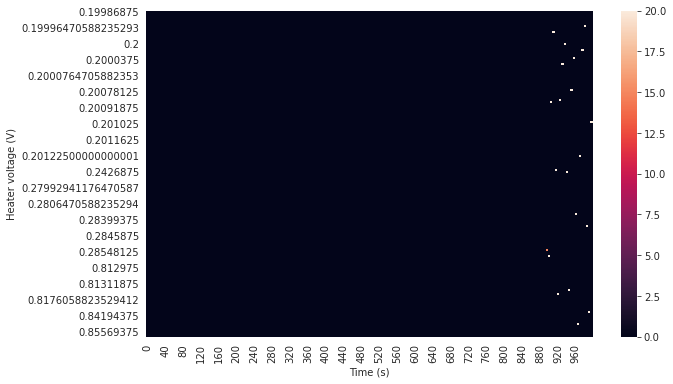

In [8]:
df_pivot = df[:200].pivot("Heater voltage (V)", "Time (s)", "CO (ppm)").fillna(0)
ax = sns.heatmap(df_pivot)
ax = plt.gcf()
ax.set_size_inches(10,6)

Two things can be observed in the previous heatmap, the absence of CO lectures before the first 900's (15min) and that there's no linear relationship between heater voltage and CO ppm.

### Checking for correlations.

In [9]:
corr = df.corr()
corr

,Time (s),CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
Time (s),1.000000,-0.108148,-0.122225,0.354152,0.007252,-0.000766,0.012030,0.011722,0.021616,0.059690,0.043098,0.036529,0.040768,0.061180,0.058258,0.066475,0.064083,0.066141,0.070053,0.064348
CO (ppm),-0.108148,1.000000,-0.103225,-0.104827,0.009367,0.000321,0.013460,0.021289,-0.003734,-0.038360,-0.084314,-0.060950,-0.075578,-0.479999,-0.487170,-0.556319,-0.528066,-0.501539,-0.536240,-0.547169
Humidity (%r.h.),-0.122225,-0.103225,1.000000,0.417056,-0.010150,-0.000138,-0.101815,-0.120912,-0.127325,-0.340288,-0.176005,-0.148652,-0.152603,0.020427,0.000336,0.056935,0.050013,0.030990,-0.000127,0.047574
Temperature (C),0.354152,-0.104827,0.417056,1.000000,0.002932,0.000781,-0.063784,-0.070762,-0.076265,-0.157074,-0.089924,-0.082125,-0.082235,0.032839,0.019698,0.057669,0.050121,0.039085,0.023551,0.053941
Flow rate (mL/min),0.007252,0.009367,-0.010150,0.002932,1.000000,-0.013241,-0.001055,-0.001963,-0.000054,0.012412,0.008331,0.005333,0.006608,0.003489,0.003843,-0.000175,0.001873,0.000722,0.002139,0.000876
Heater voltage (V),-0.000766,0.000321,-0.000138,0.000781,-0.013241,1.000000,-0.419103,-0.393604,-0.460465,-0.689996,-0.678130,-0.615707,-0.664399,-0.764795,-0.735536,-0.688588,-0.740101,-0.752887,-0.710664,-0.708071
R1 (MOhm),0.012030,0.013460,-0.101815,-0.063784,-0.001055,-0.419103,1.000000,0.995419,0.987424,0.778164,0.856330,0.905950,0.874975,0.452774,0.488823,0.423129,0.374613,0.478662,0.462800,0.414583
R2 (MOhm),0.011722,0.021289,-0.120912,-0.070762,-0.001963,-0.393604,0.995419,1.000000,0.981643,0.760636,0.834046,0.885393,0.852893,0.420772,0.457132,0.392782,0.344092,0.448269,0.432421,0.383432
R3 (MOhm),0.021616,-0.003734,-0.127325,-0.076265,-0.000054,-0.460465,0.987424,0.981643,1.000000,0.832066,0.901395,0.946574,0.918705,0.504473,0.540380,0.470077,0.423760,0.524869,0.511772,0.463464
R4 (MOhm),0.059690,-0.038360,-0.340288,-0.157074,0.012412,-0.689996,0.778164,0.760636,0.832066,1.000000,0.967319,0.939915,0.955496,0.674199,0.696351,0.610847,0.603777,0.675660,0.668570,0.621317


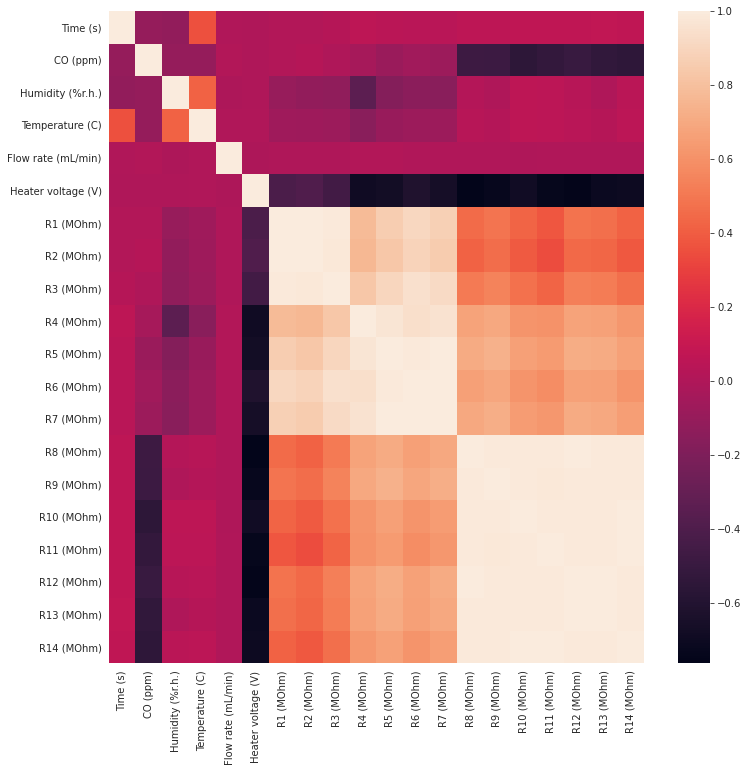

In [10]:
ax = sns.heatmap(corr, annot=False)
heat_map=plt.gcf()
heat_map.set_size_inches(12,12)

In the previous heatmap we can appreciate strong negative correlation between the R8 to R14 sensors and the presence of CO particles.

### Central Tendencies

In [11]:
# Removing the first 180 bins that correspond to the cleaning of the machine.
df = df[180:]

In [12]:
df.describe()

,Time (s),CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
count,18002.000000,18002.000000,18002.000000,18002.000000,18002.000000,18002.000000,18002.000000,18002.000000,18002.000000,18002.000000,18002.000000,18002.000000,18002.000000,18002.000000,18002.000000,18002.000000,18002.000000,18002.000000,18002.000000,18002.000000
mean,41573.381013,9.999021,45.706928,26.426873,239.941130,0.355400,15.366322,17.629225,22.514913,19.232875,31.519994,28.990928,31.972524,26.788652,22.246194,25.746290,27.562349,25.615671,22.300598,28.614824
std,25697.113140,6.378180,12.521469,0.103841,1.685955,0.272445,20.407168,24.698106,26.866066,15.081317,25.324074,25.709058,26.106731,18.599174,16.050299,19.820851,19.589135,17.829308,16.367308,21.096123
min,0.000000,0.000000,16.390000,26.152056,28.942107,0.199733,0.080975,0.133956,0.113644,0.098806,0.114856,0.121050,0.125762,0.094113,0.092387,0.111875,0.102550,0.101906,0.101527,0.108144
25%,18891.250000,4.440000,36.140000,26.380000,239.926723,0.200035,0.442355,0.563164,0.854039,3.276992,2.682522,2.192354,2.859074,15.488023,10.690413,9.994170,15.074204,12.789934,10.041113,12.590635
50%,41392.500000,8.890000,46.640000,26.460000,239.972303,0.201594,1.850592,1.484818,4.702467,19.462575,33.057592,25.192681,32.137225,26.608916,21.506987,23.629153,26.885182,25.436062,21.065897,26.683594
75%,63893.750000,15.560000,55.671823,26.500000,240.015019,0.278938,28.568998,33.733733,49.521587,30.655006,53.742486,54.309690,56.709457,39.483982,33.242414,39.497637,40.845360,38.018122,33.236195,43.361259
max,86395.000000,20.000000,72.920000,26.620000,246.805481,0.898119,79.629831,91.404387,93.371212,65.642319,99.216350,96.246200,99.305013,73.893769,63.979119,75.793631,77.114006,72.422069,68.486144,79.590213


In the describe dataframe we can see that the 75% quartile value and the max value from the sensors readings have a large gap between them, this indicates the presence of outliers.

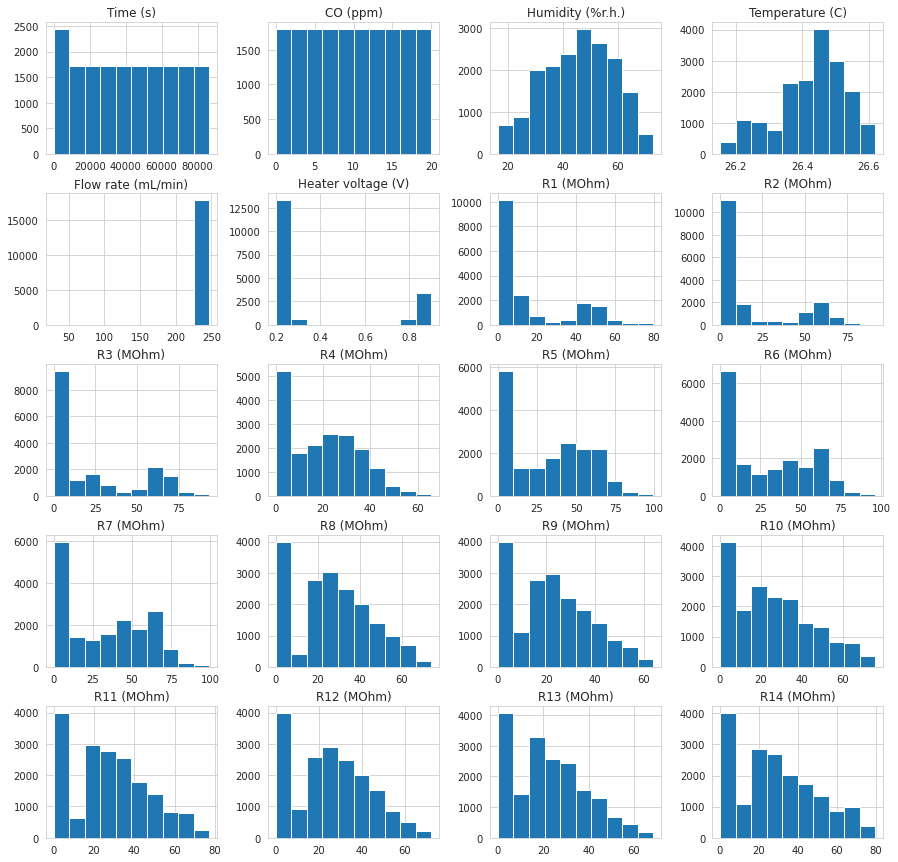

In [13]:
size = (15,15)
df.hist(figsize=size);#;

The CO particles readings are distributed evenly.



The readings from the sensors have a left-skewed shape, this can be due to outliers and instrumental noise.

### Time Analysis.

In [14]:
# First I'll reconvert the index into time format instead of intervals
# TS stands for "Time Stamped"
df_ts=df.reset_index(drop=True)
df_ts['Time (s)'] = pd.to_timedelta(df_ts['Time (s)'], unit='sec')
df_ts = df_ts.set_index('Time (s)')
df_ts.head()

,CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
Time (s),,,,,,,,,,,,,,,,,,,
0 days 00:15:00,20.0,49.220000,26.46,239.751794,0.812806,0.446438,1.010481,1.670556,1.081931,1.592006,1.763244,2.133850,3.948550,3.341281,4.385894,5.149756,5.652406,5.443056,6.969938
0 days 00:15:05,20.0,49.161919,26.46,239.958119,0.200900,45.519169,55.063762,62.705019,33.023162,60.867281,60.841225,61.601231,68.996831,57.246812,72.647238,73.036556,66.004537,60.213887,75.534575
0 days 00:15:10,20.0,48.710000,26.46,240.041444,0.199975,8.484631,6.235831,17.516525,25.938281,42.320669,38.914275,42.190344,59.587894,53.164331,64.062156,62.752581,53.894375,51.166931,71.026369
0 days 00:15:15,20.0,48.710000,26.46,240.115575,0.242463,0.862356,0.772644,1.797606,15.773494,25.409431,15.651063,21.729369,47.374294,40.943062,50.600938,50.102575,41.072288,37.295575,53.935313
0 days 00:15:20,20.0,48.639406,26.46,240.039594,0.817506,0.635076,1.407741,2.283565,1.486329,2.245953,2.452712,2.857894,4.573306,3.906029,4.899935,5.775371,5.964353,4.989618,7.116694


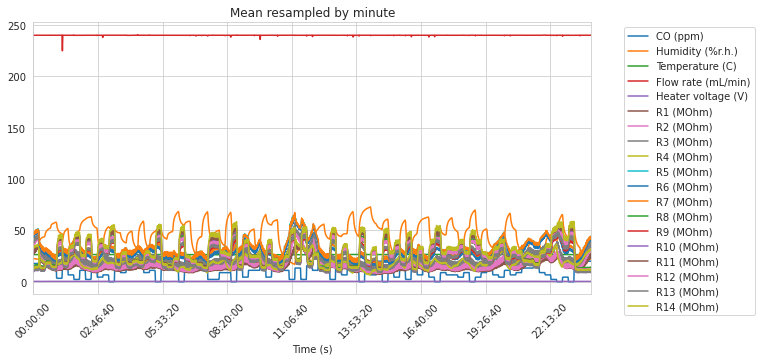

In [15]:
df_ts.resample('min').mean().plot(grid=True,figsize=(10,5))
plt.xticks(rotation=45)
plt.title('Mean resampled by minute')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

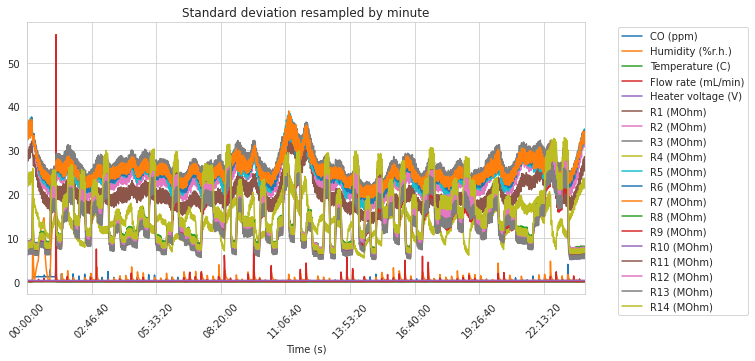

In [16]:
df_ts.resample('min').std().plot(grid=True,figsize=(10,5))
plt.xticks(rotation=45)
plt.title('Standard deviation resampled by minute')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

### Lag Analysis

The autocorrelation of the target variable is going to be checked against fixed intervals.

Text(0.5, 1.0, 'Autocorrelation in 5 seconds intervals')

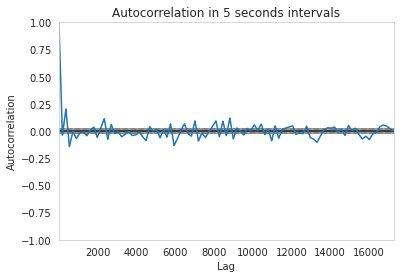

In [17]:
p = df_ts.resample('5S').mean()
pd.plotting.autocorrelation_plot(p['CO (ppm)'])
plt.title('Autocorrelation in 5 seconds intervals')

Text(0.5, 1.0, 'Autocorrelation in 1 minute intervals')

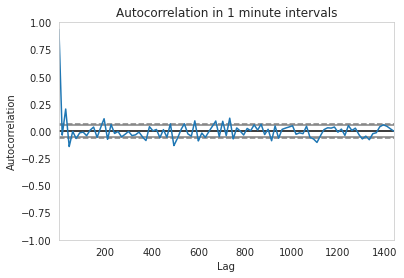

In [18]:
p = df_ts.resample('min').mean()
pd.plotting.autocorrelation_plot(p['CO (ppm)'])
plt.title('Autocorrelation in 1 minute intervals')

Text(0.5, 1.0, 'Autocorrelation in 1 hour intervals')

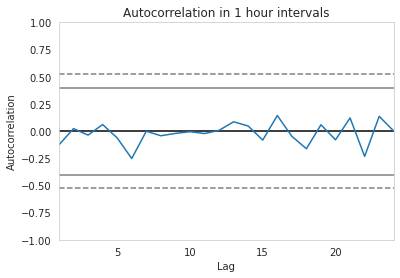

In [19]:
p = df_ts.resample('H').mean()
pd.plotting.autocorrelation_plot(p['CO (ppm)'])
plt.title('Autocorrelation in 1 hour intervals')

Text(0.5, 0.98, 'Lag plots for CO (ppm) on intervals of 5S')

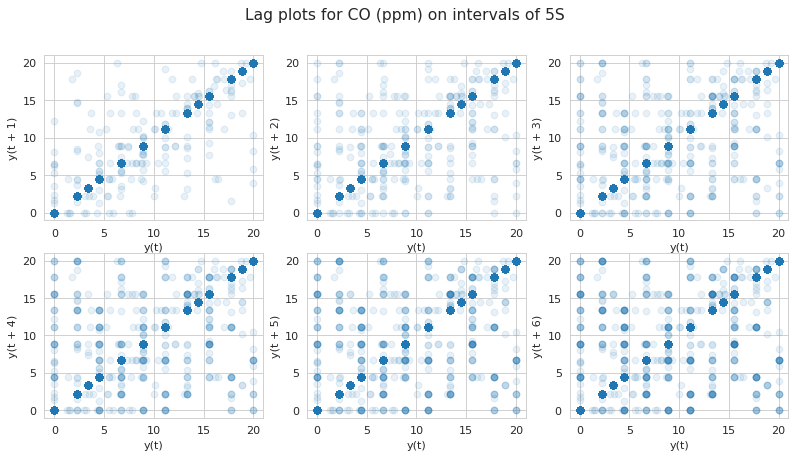

In [20]:
p = df_ts.resample('5S').mean()

fig, axs = plt.subplots(nrows= 2, ncols = 3, figsize=(12,6),
                        dpi=80, facecolor='w', edgecolor='k')
ax1 = pd.plotting.lag_plot(p['CO (ppm)'], lag=1,ax=axs[0][0], alpha=0.1)
ax2 = pd.plotting.lag_plot(p['CO (ppm)'], lag=2,ax=axs[0][1], alpha=0.1)
ax3 = pd.plotting.lag_plot(p['CO (ppm)'], lag=3,ax=axs[0][2], alpha=0.1)
ax4 = pd.plotting.lag_plot(p['CO (ppm)'], lag=4,ax=axs[1][0], alpha=0.1)
ax5 = pd.plotting.lag_plot(p['CO (ppm)'], lag=5,ax=axs[1][1], alpha=0.1)
ax6 = pd.plotting.lag_plot(p['CO (ppm)'], lag=6,ax=axs[1][2], alpha=0.1)

fig.suptitle("Lag plots for CO (ppm) on intervals of 5S", fontsize=14)


Text(0.5, 0.98, 'Lag plots for CO (ppm) on intervals of 1min')

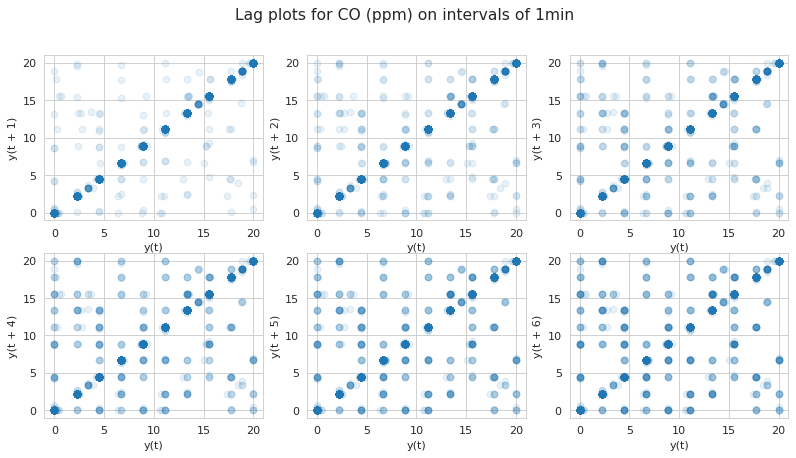

In [21]:
p = df_ts.resample('min').mean()

fig, axs = plt.subplots(nrows= 2, ncols = 3, figsize=(12,6),
                        dpi=80, facecolor='w', edgecolor='k')
ax1 = pd.plotting.lag_plot(p['CO (ppm)'], lag=1,ax=axs[0][0], alpha=0.1)
ax2 = pd.plotting.lag_plot(p['CO (ppm)'], lag=2,ax=axs[0][1], alpha=0.1)
ax3 = pd.plotting.lag_plot(p['CO (ppm)'], lag=3,ax=axs[0][2], alpha=0.1)
ax4 = pd.plotting.lag_plot(p['CO (ppm)'], lag=4,ax=axs[1][0], alpha=0.1)
ax5 = pd.plotting.lag_plot(p['CO (ppm)'], lag=5,ax=axs[1][1], alpha=0.1)
ax6 = pd.plotting.lag_plot(p['CO (ppm)'], lag=6,ax=axs[1][2], alpha=0.1)

fig.suptitle("Lag plots for CO (ppm) on intervals of 1min", fontsize=14)

Text(0.5, 0.98, 'Lag plots for CO (ppm) on intervals of 1 hour')

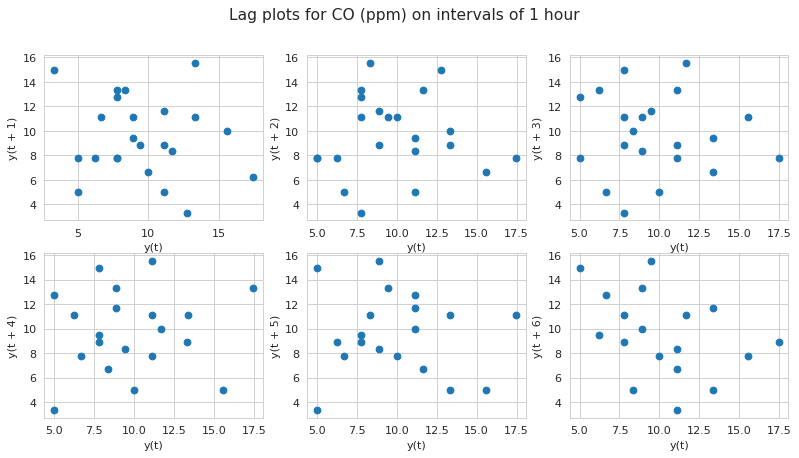

In [22]:
p = df_ts.resample('H').mean()

fig, axs = plt.subplots(nrows= 2, ncols = 3, figsize=(12,6),
                        dpi=80, facecolor='w', edgecolor='k')
ax1 = pd.plotting.lag_plot(p['CO (ppm)'], lag=1,ax=axs[0][0], alpha=1)
ax2 = pd.plotting.lag_plot(p['CO (ppm)'], lag=2,ax=axs[0][1], alpha=1)
ax3 = pd.plotting.lag_plot(p['CO (ppm)'], lag=3,ax=axs[0][2], alpha=1)
ax4 = pd.plotting.lag_plot(p['CO (ppm)'], lag=4,ax=axs[1][0], alpha=1)
ax5 = pd.plotting.lag_plot(p['CO (ppm)'], lag=5,ax=axs[1][1], alpha=1)
ax6 = pd.plotting.lag_plot(p['CO (ppm)'], lag=6,ax=axs[1][2], alpha=1)

fig.suptitle("Lag plots for CO (ppm) on intervals of 1 hour", fontsize=14)

From the previous lag analysis we can determine that exists correlation within shorter intervals of time, in the other hand if the intervals between samples are increased, the autocorrelation between intervals is decreased.

### Correlation in different sample intervals.

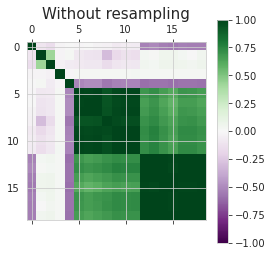

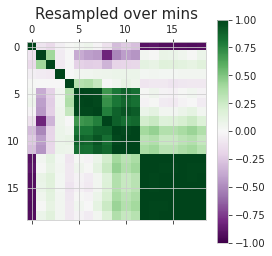

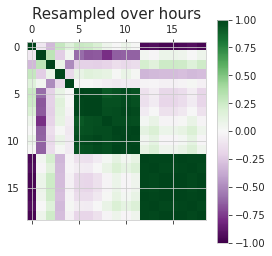

In [23]:
plt.matshow(df_ts.corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('Without resampling', size=15)
plt.colorbar()
plt.matshow(df_ts.resample('min').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('Resampled over mins', size=15)
plt.colorbar()
plt.margins(0.02)
plt.matshow(df_ts.resample('H').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('Resampled over hours', size=15)
plt.colorbar()
plt.show()

### Data Pre-Processing.

For the solution of this problem the LSTM model is going to be used as is best-fit for sequencial or time series problems and forecasting.

In [24]:
df_ts = df_ts.reset_index()
date = datetime.strptime("20160930_203718",'%Y%m%d_%H%M%S')
df_ts['Time (s)'] = [x+date for x in df_ts['Time (s)']]
df_ts.set_index('Time (s)', inplace=True)

In [40]:
df_ts.head()

,CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
Time (s),,,,,,,,,,,,,,,,,,,
2016-09-30 20:52:18,20.0,49.220000,26.46,239.751794,0.812806,0.446438,1.010481,1.670556,1.081931,1.592006,1.763244,2.133850,3.948550,3.341281,4.385894,5.149756,5.652406,5.443056,6.969938
2016-09-30 20:52:23,20.0,49.161919,26.46,239.958119,0.200900,45.519169,55.063762,62.705019,33.023162,60.867281,60.841225,61.601231,68.996831,57.246812,72.647238,73.036556,66.004537,60.213887,75.534575
2016-09-30 20:52:28,20.0,48.710000,26.46,240.041444,0.199975,8.484631,6.235831,17.516525,25.938281,42.320669,38.914275,42.190344,59.587894,53.164331,64.062156,62.752581,53.894375,51.166931,71.026369
2016-09-30 20:52:33,20.0,48.710000,26.46,240.115575,0.242463,0.862356,0.772644,1.797606,15.773494,25.409431,15.651063,21.729369,47.374294,40.943062,50.600938,50.102575,41.072288,37.295575,53.935313
2016-09-30 20:52:38,20.0,48.639406,26.46,240.039594,0.817506,0.635076,1.407741,2.283565,1.486329,2.245953,2.452712,2.857894,4.573306,3.906029,4.899935,5.775371,5.964353,4.989618,7.116694


In [41]:
cols = list(df_ts)[5:]
cols.insert(0,'CO (ppm)')
cols

['CO (ppm)',
 'R1 (MOhm)',
 'R2 (MOhm)',
 'R3 (MOhm)',
 'R4 (MOhm)',
 'R5 (MOhm)',
 'R6 (MOhm)',
 'R7 (MOhm)',
 'R8 (MOhm)',
 'R9 (MOhm)',
 'R10 (MOhm)',
 'R11 (MOhm)',
 'R12 (MOhm)',
 'R13 (MOhm)',
 'R14 (MOhm)']

In [42]:
dataset_train = df_ts[cols].astype(str)

In [43]:
training_set = dataset_train.values
training_set.shape

(18002, 15)

In [44]:
# Scaling the sets
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

training_set_scaled = sc.fit_transform(training_set)
sc_predict = StandardScaler()
sc_predict.fit_transform(training_set[:, 0:1])


array([[ 1.56804243],
       [ 1.56804243],
       [ 1.56804243],
       ...,
       [-1.2196641 ],
       [-1.2515138 ],
       [-1.56773544]])

In [107]:
# Creating a data structure with 90 timestamps and 1 output
X_train = []
y_train = []

n_future = 10   # Number of steps we want top predict into the future
n_past = 20     # Number of past step we want to use to predict the future

for i in range(n_past, len(training_set_scaled) - n_future +1):
    X_train.append(training_set_scaled[i - n_past:i, 0:dataset_train.shape[1] - 1])
    y_train.append(training_set_scaled[i + n_future - 1:i + n_future, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

X_train shape == (17973, 20, 14).
y_train shape == (17973, 1).


In [108]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard


### LSTM Model definition

In [109]:
# Initializing the Neural Network based on LSTM
model = Sequential()

# Adding 1st LSTM layer
model.add(LSTM(units=64, return_sequences=True, input_shape=(n_past, dataset_train.shape[1]-1)))

# Adding 2nd LSTM layer
model.add(LSTM(units=10, return_sequences=False))

# Adding Dropout
model.add(Dropout(0.25))

# Output layer
model.add(Dense(units=1, activation='linear'))

# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')

### Training Model

In [110]:
%%time
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

history = model.fit(X_train, y_train, shuffle=True, epochs=30, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=256)

Epoch 1/30
57/57 [==============================] - 11s 128ms/step - loss: 0.3262 - val_loss: 0.1438

Epoch 00001: val_loss improved from inf to 0.14379, saving model to weights.h5
Epoch 2/30
57/57 [==============================] - 6s 97ms/step - loss: 0.1736 - val_loss: 0.0778

Epoch 00002: val_loss improved from 0.14379 to 0.07781, saving model to weights.h5
Epoch 3/30
57/57 [==============================] - 5s 96ms/step - loss: 0.1529 - val_loss: 0.0826

Epoch 00003: val_loss did not improve from 0.07781
Epoch 4/30
57/57 [==============================] - 7s 117ms/step - loss: 0.1530 - val_loss: 0.0679

Epoch 00004: val_loss improved from 0.07781 to 0.06791, saving model to weights.h5
Epoch 5/30
57/57 [==============================] - 5s 94ms/step - loss: 0.1489 - val_loss: 0.0821

Epoch 00005: val_loss did not improve from 0.06791
Epoch 6/30
57/57 [==============================] - 6s 110ms/step - loss: 0.1625 - val_loss: 0.0737

Epoch 00006: val_loss did not improve from 0.0679

In [111]:
datelist_train = list(dataset_train.index)
datelist_future = pd.date_range(datelist_train[-1], periods=n_future, freq='5s').tolist()

In [112]:
predictions_future = model.predict(X_train[-n_future:])

predictions_train = model.predict(X_train[n_past:])

In [113]:
y_pred_future = sc_predict.inverse_transform(predictions_future)
y_pred_train = sc_predict.inverse_transform(predictions_train)

In [114]:
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['CO (ppm)']).set_index(pd.Series(datelist_future))
PREDICTIONS_TRAIN = pd.DataFrame(y_pred_train, columns=['CO (ppm)']).set_index(pd.Series(datelist_train[2 * n_past + n_future -1:]))

In [115]:
PREDICTIONS_FUTURE

,CO (ppm)
2016-09-30 21:52:23,3.518855
2016-09-30 21:52:28,3.597547
2016-09-30 21:52:33,3.748709
2016-09-30 21:52:38,3.907246
2016-09-30 21:52:43,3.803975
2016-09-30 21:52:48,3.619905
2016-09-30 21:52:53,3.802631
2016-09-30 21:52:58,3.889101
2016-09-30 21:53:03,4.350222
2016-09-30 21:53:08,3.487951


In [116]:
PREDICTIONS_TRAIN

,CO (ppm)
2016-09-30 20:56:23,20.107319
2016-09-30 20:56:28,19.844032
2016-09-30 20:56:33,19.812937
2016-09-30 20:56:38,19.915142
2016-09-30 20:56:43,20.022472
...,...
2016-09-30 21:52:03,3.619905
2016-09-30 21:52:08,3.802631
2016-09-30 21:52:13,3.889101
2016-09-30 21:52:18,4.350221


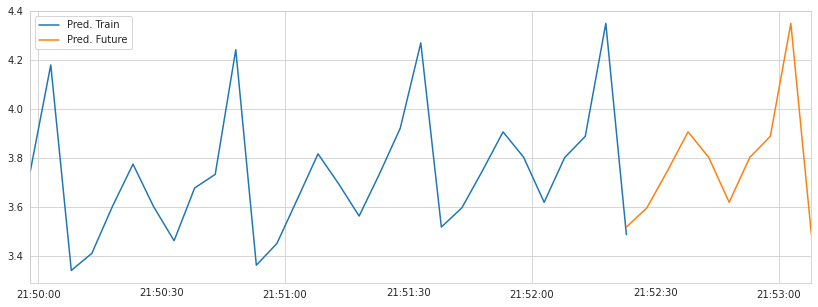

In [117]:
# Set plot size 
ax = PREDICTIONS_TRAIN[-30:].plot()
PREDICTIONS_FUTURE.plot(ax=ax)
ax.legend(['Pred. Train', 'Pred. Future'])
ax.legend(['Pred. Train', 'Pred. Future'])
